## 정규방정식
### 활용하면 mse값을 최소로 하는 파라미터를 바로 얻을 수 있다. 최소자승법을 코드로 구현할 수도 있고, scikit-learn패키지에 선형회귀 함수를 import 해도된다.

### 캐글의 insurance 데이터를 활용해 선형회귀 모델을 구현한다
#### www.kaggle.com/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('insurance.csv') ####데이터 불러오기

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


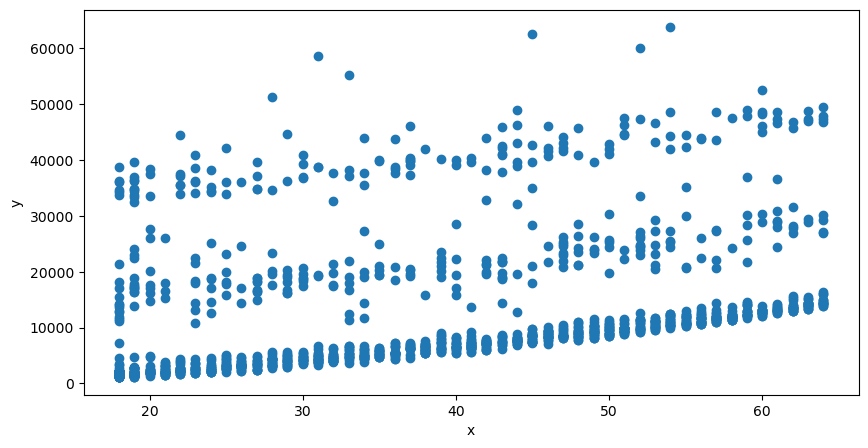

In [6]:
x = data['age']
y = data['charges']

plt.figure(figsize = (10,5))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
x = np.array(data['age'])

In [16]:
x

array([19, 18, 28, ..., 18, 21, 61], dtype=int64)

In [8]:
x.shape

(1338,)

In [9]:
y = np.array(data['charges'])

In [10]:
y.shape

(1338,)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x,y) ### reshpa 하라는 오류가 발생 .fit은 2차원 array를 입력받음

ValueError: Expected 2D array, got 1D array instead:
array=[19 18 28 ... 18 21 61].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
x = x.reshape(1338,1)
y = y.reshape(1338,1)

In [18]:
x

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [19]:
lr.fit(x,y) 

LinearRegression()

In [20]:
print(lr.intercept_)

[3165.88500606]


In [21]:
print(lr.coef_)

[[257.72261867]]


In [22]:
print(lr.score(x,y))

0.08940589967885804


In [23]:
x_new = [[19],[64]]

In [24]:
x_new

[[19], [64]]

In [25]:
y_hat = lr.predict(x_new)

In [26]:
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


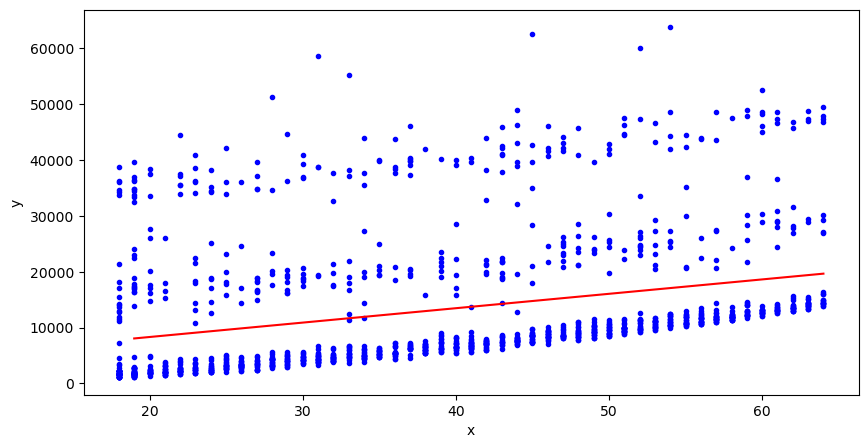

In [27]:


plt.figure(figsize = (10,5))
plt.plot(x,y,"b.")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_new,y_hat,"-r")
plt.show()##설명력이 진짜 별로다

# 경사하강법
### 함수의 값이 낮아지는 방향으로 독립변수의 값을  바꿔가면서 최소 함숫값을 갖도록 하는 것이다
### 종류
#### 확률적 경사하강법
##### 샘플데이터를 무작위로 선택, 샘플에 대한 경사 계산.
###### 알고리즘이 멈출 때 최솟값이 아닐 수 있지만, global minimum에 도달할 확률이 높고 계산 속도가 빠르다
#### 배치 경사하강법
##### 계산양이 졸라 많다. 전체 훈련세트를 사용한다. 잡음이 적은 최적치를 찾을 수 있다.
#### 미니배치 경사 하강법
##### local minimum에서 빠져나오지 못할 수 있지만, 확률적 경사하강법 보다 낮은 오차율을 갖는다.

## 확률적 경사하강법을 활용한 회귀분석 (SGDRegressor)

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

In [29]:
data = pd.read_csv("insurance.csv")

In [30]:
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)

sgd_reg = SGDRegressor(max_iter = 10000, random_state = 34)
sgd_reg.fit(x,y.ravel())

SGDRegressor(max_iter=10000, random_state=34)

In [31]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[9057.21833765]
[484.13243757]


In [32]:
x_new = [[19],[64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[18255.73465154 40041.69434233]


In [33]:
print(sgd_reg.score(x,y))

-1.4678931558897292


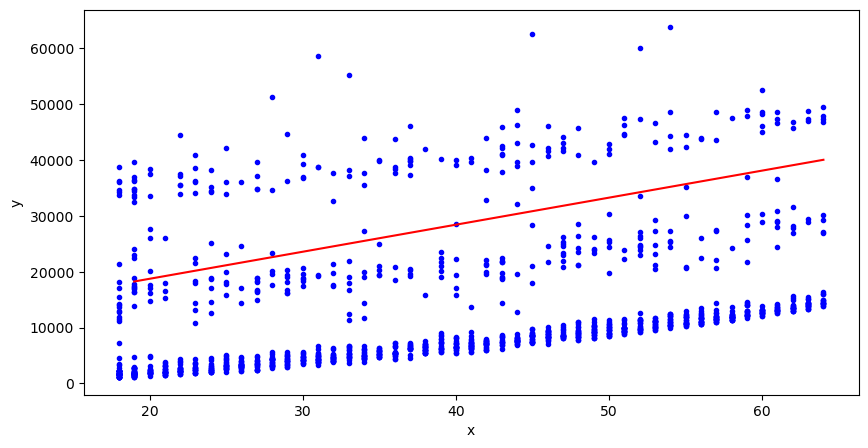

In [34]:


plt.figure(figsize = (10,5))
plt.plot(x,y,"b.")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_new,y_hat,"-r")
plt.show()##설명력이 진짜 별로다

In [35]:
from sklearn.preprocessing import StandardScaler


In [36]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
sgd_reg.fit(x_scaled, y.ravel())


SGDRegressor(max_iter=10000, random_state=34)

In [38]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[13128.95588581]
[3566.29781948]


In [39]:
x_new = [[19],[64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 80888.61445597 241372.01633265]


In [40]:
x_scaled.shape

(1338, 1)

In [41]:
y_hat.shape

(2,)

In [42]:
print(sgd_reg.score(x_scaled,y.ravel()))

0.08924991764684109


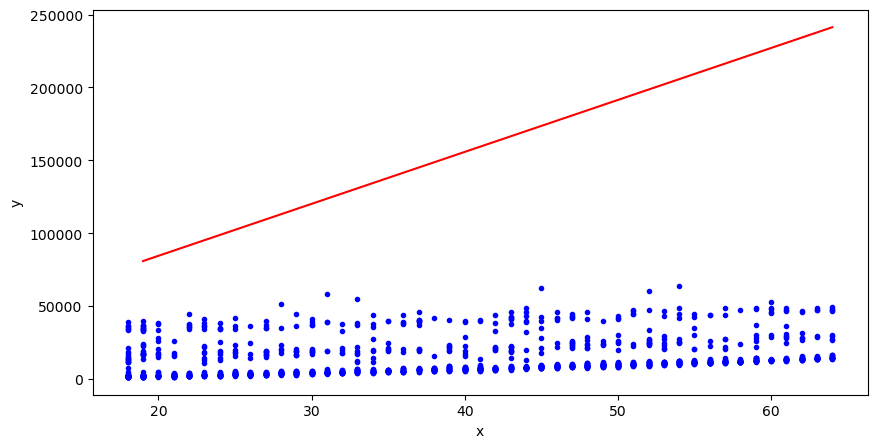

In [43]:


plt.figure(figsize = (10,5))
plt.plot(x,y,"b.")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_new,y_hat,"-r")
plt.show()##설명력이 진짜 별로다

## 다항회귀

### 데이터가 단순한 직선 형태가 아닌 비선형의 형태를 갖고 있을 때 변수의 거듭제곱을 새로운 변수로 추가하면 선형모델을 사용 가능하다.

#### scikit-learn의 ploynomialFeatures 를 활용하면 변수 특성을 거듭제곱으로 변환할 수 있으나, 과대적합의 가능성이 있다
#### https://www.kaggle.com/datasets/crawford/80-cereals  데이터 셋은 여기서 가져온다~

In [44]:
import pandas as pd
cereal = pd.read_csv('cereal.csv')

In [45]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


### 분석에 필요한 데이터 int, float 형만 남기고 제거한다. 그리고 설탕 함류량이 0 이상인 것만 챙긴다 

In [46]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >=0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [48]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars','rating']]
cereal2.sort_values(by=['sugars'], inplace = True)


C:\Users\tjtnd\AppData\Local\Temp\ipykernel_13960\3705559628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace = True)


In [50]:
cereal2

,sugars,rating
20,0,64.533816
54,0,60.756112
55,0,63.005645
3,0,93.704912
63,0,68.235885
...,...,...
52,14,37.840594
6,14,33.174094
70,14,28.592785
66,15,31.230054


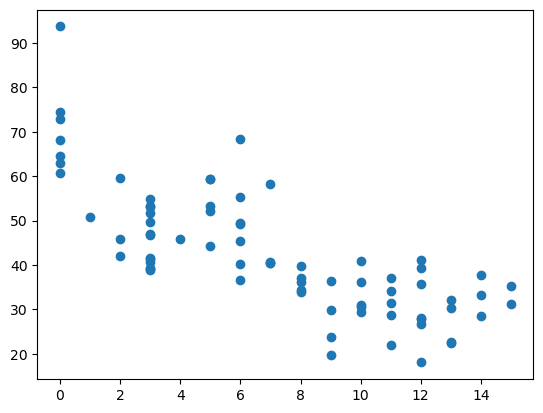

In [51]:
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x,y)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [55]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [56]:
from sklearn.preprocessing import PolynomialFeatures


In [57]:
ploy_reg = PolynomialFeatures(degree = 2)

In [60]:
x_ploy = ploy_reg.fit_transform(x_train.reshape(-1,1))

In [61]:
x_ploy

array([[  1.,  11., 121.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       [  1.,   6.,  36.],
       [  1.,  12., 144.],
       [  1.,   7.,  49.],
       [  1.,   3.,   9.],
       [  1.,  13., 169.],
       [  1.,   0.,   0.],
       [  1.,  11., 121.],
       [  1.,   9.,  81.],
       [  1.,  12., 144.],
       [  1.,   8.,  64.],
       [  1.,   4.,  16.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  13., 169.],
       [  1.,   9.,  81.],
       [  1.,   1.,   1.],
       [  1.,  14., 196.],
       [  1.,  10., 100.],
       [  1.,   3.,   9.],
       [  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,   6.,  36.],
       [  1.,   9.,  81.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,   3.,   9.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
 

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
reg = LinearRegression()
reg.fit(x_ploy,y_train)

LinearRegression()

In [64]:
y_train

array([37.136863, 45.328074, 36.176196, 36.523683, 28.025765, 40.69232 ,
       41.50354 , 22.396513, 93.704912, 34.139765, 23.804043, 18.042851,
       37.038562, 45.811716, 41.998933, 51.592193, 64.533816, 30.313351,
       36.471512, 50.764999, 28.592785, 40.917047, 53.371007, 54.850917,
       68.402973, 40.105965, 19.823573, 39.7034  , 30.450843, 40.560159,
       68.235885, 26.734515, 39.106174, 53.313813, 59.425505, 36.187559,
       46.895644, 32.207582, 41.445019, 35.252444, 41.015492, 38.839746,
       29.509541, 59.363993, 72.801787, 60.756112, 39.241114, 35.782791,
       74.472949, 45.863324, 33.174094, 49.787445, 58.345141])

In [66]:
x_test_poly = ploy_reg.transform(x_test.reshape(-1,1))
pred = reg.predict(x_test_poly)

np.set_printoptions(precision=2)


In [68]:
print(np.concatenate((pred.reshape(len(pred), 1),
                     y_test.reshape(len(y_test),1)),1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_error

In [71]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc= reg.score(ploy_reg.transform(x_test.reshape(-1,1)), y_test)
print(mse)
print(mae)
print(rmse)
print(acc)

33.565110793011065
4.605784071295573
5.793540436815046
0.7437569749767219


In [74]:
x_new = np.linspace(0,15,100).reshape(100,1)
x_new_poly = ploy_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

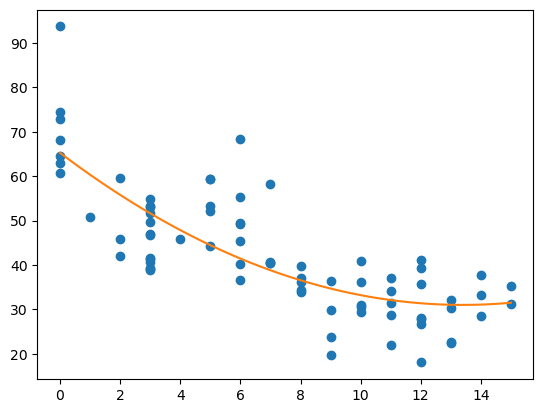

In [76]:
plt.plot(x,y,'o', label = 'Actual')
plt.plot(x_new,y_new)
plt.show()

In [112]:
x = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [115]:
from sklearn.linear_model import LinearRegression
x_poly = poly_reg.fit_transform(x_train)

In [116]:
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [117]:
x_test_ploy = poly_reg.transform(x_test)
pred = reg.predict(x_test_ploy)

In [119]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc= reg.score(poly_reg.transform(x_test), y_test)
print(mse)
print(mae)
print(rmse)
print(acc)

9.612174906886727
2.1334209169195733
3.100350771588068
0.9262790194714015


# 다중회귀

## 다중회귀는 여러 독립 변수들이 y값에 미치는 영향을 함께 고려하기 위해 사용되며, 여러 독립변수간 상호작용이나 다중공산성 문제를 고려해야 한다.

###### 참고 다항회귀는 고차항을 추가 함으로.... 과적합의 문제가 있다

# 변수 선택법

## 다중 선형 모델의 성능을 높이기 위해 독립변수의 부분집합을 선택할 것. 
### 1. 규제가 있는 다항 회귀모델.
#### 릿지, 라쏘, 엘라스틱 넷 ----> 이 3가지 방법은 계수 추정치를 0으로 수축하는데 가장 유명한 규제 방법이다.


## 릿지 코드 실습

In [123]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

In [124]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [128]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3,1,5)
data = []

for i, a in enumerate(alpha):
    ridge = Ridge(alpha = a)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))
    
    
df_ridge = pd.DataFrame(data, index=alpha)

df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


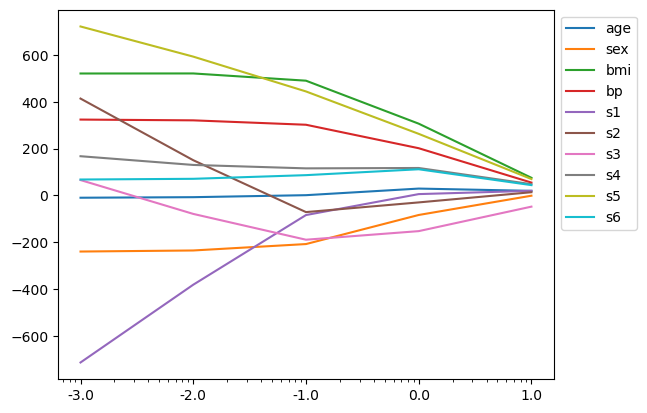

In [129]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ridge.columns, bbox_to_anchor = (1,1))


# mse를 사용한 회귀 모델은 a= 0일때랑 같다. a가 작으면 mse와 비슷하다.

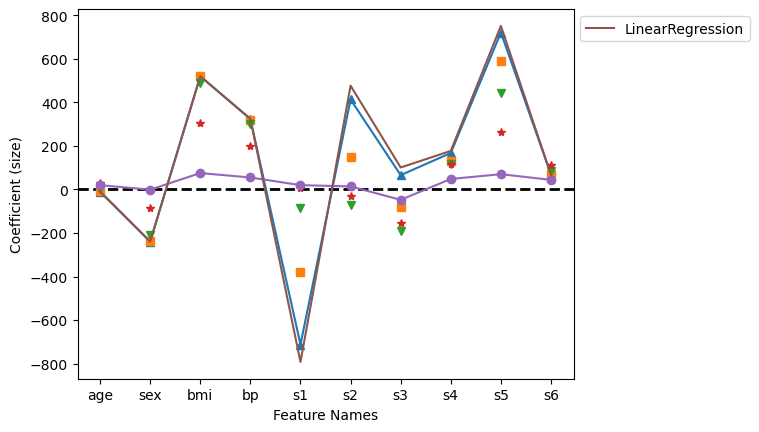

In [132]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x,y)

plt.axhline(y=0, linestyle = '--',color = 'black', linewidth = 2)
plt.plot(df_ridge.loc[0.001],'^-')
plt.plot(df_ridge.loc[0.010],'s')
plt.plot(df_ridge.loc[0.100],'v')
plt.plot(df_ridge.loc[1.000],'*')
plt.plot(df_ridge.loc[10.000],'o-')
plt.plot(lr.coef_, label = "LinearRegression")
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

### 라쏘 
#### 라쏘회귀는 0으로 만드는 회귀이다.
##### 변수의 크기가 너무 큰걸 릿지로 하면 어려움이 발생한다.

In [133]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3,1,5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a)
    lasso.fit(x,y)
    data.append(pd.Series(np.hstack([lasso.coef_])))
    
    
df_lasso = pd.DataFrame(data, index=alpha)

df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


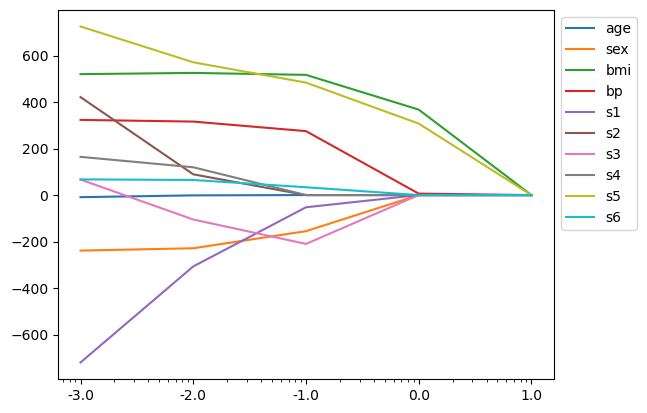

In [134]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_lasso.columns, bbox_to_anchor = (1,1))


## 엘라스틱 넷은 둘의 혼합이다.

In [139]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3,1,5)
data = []
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha = a, l1_ratio = 0.5)
    ela.fit(x,y)
    data.append(pd.Series(np.hstack([ela.coef_])))
    
    
df_ela = pd.DataFrame(data, index=alpha)

df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


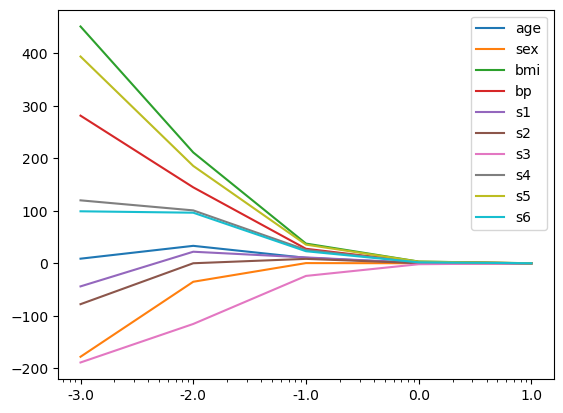

In [140]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ela.columns, bbox_to_anchor = (1,1))


## 로지스틱 회귀 분석

## 범주형일때 사용하는 회귀분석

### 오즈비
#### ex) 카드대금 연체 1/3 아니면 2/3 오즈비는 1/3/2/3 = 1/2
##### www.kaggle.com/kukuroo3/body-performance-data 에서 데이터 받은 후 실습하기